# Rent Price Estimator

In [54]:
# Libraries
import numpy as np
import pandas as pd
import ipywidgets as widgets
import math
import platform
from sklearn.linear_model import LinearRegression
from sklearn import metrics, model_selection
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from IPython.display import display, clear_output

In [55]:
# Load data from CSV
df = pd.read_csv('_All_Cities_Cleaned.csv')
df.drop(['bedroom', 'seller_type', 'layout_type', 'property_type', 'locality', 'bathroom'], axis=1, inplace=True)

# Remove outliers
df = df[(df['price'] < 100000)]
df = df[(df['area'] < 5000)]

# Display Sample of Data

In [56]:
print('Snippet of Data:\n')
print(df.head())

Snippet of Data:

     price    area    furnish_type       city
0  20000.0  1450.0       Furnished  Ahmedabad
1   7350.0   210.0  Semi-Furnished  Ahmedabad
2  22000.0  1900.0     Unfurnished  Ahmedabad
3  13000.0  1285.0  Semi-Furnished  Ahmedabad
4  18000.0  1600.0       Furnished  Ahmedabad


# Scatter Plot of All Data

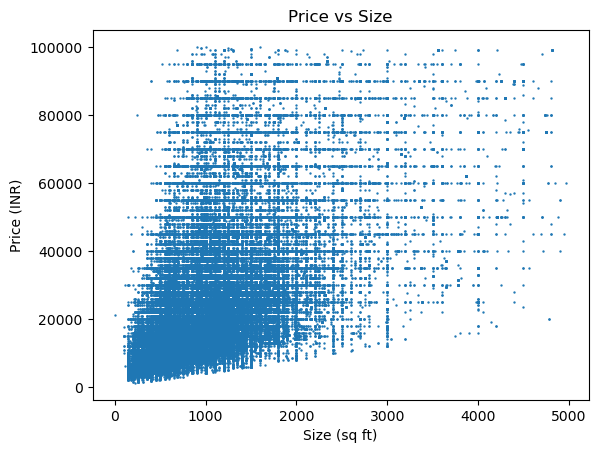

In [57]:
pyplot.scatter(x=df['area'], y=df['price'], s=.5)
pyplot.xlabel('Size (sq ft)')
pyplot.ylabel('Price (INR)')
pyplot.title('Price vs Size')
pyplot.show()

# Box and Whiskers of Rent Prices

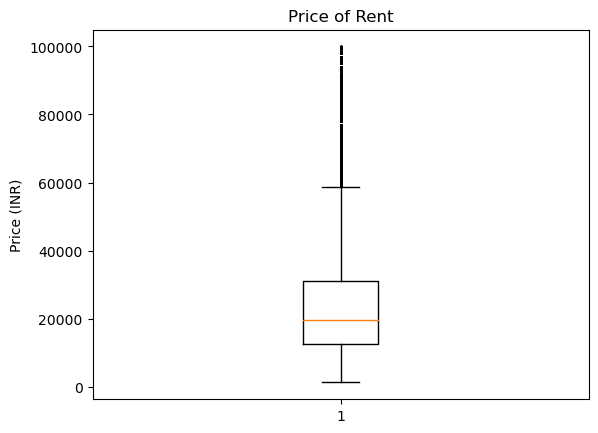

In [58]:
pyplot.boxplot(df['price'], flierprops=dict(markersize=1))
pyplot.title('Price of Rent')
pyplot.ylabel('Price (INR)')
pyplot.show()

# Histogram of Rent Prices

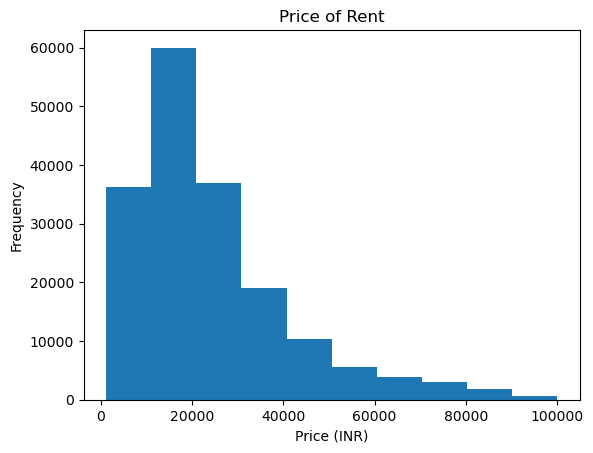


Additonal Stats:

Mean rent price: ₹24617.47
Median rent price: ₹19500.0

Mean area: 1056.98 sq ft
Median area: 985.0 sq ft

Size of dataset: 177758


In [59]:
pyplot.hist(df['price'], bins=10)
pyplot.xlabel('Price (INR)')
pyplot.ylabel('Frequency')
pyplot.title('Price of Rent')
pyplot.show()

print('\nAdditonal Stats:')
print('\nMean rent price: ₹{}'.format(df['price'].mean().round(2)))
print('Median rent price: ₹{}'.format(df['price'].median()))

print('\nMean area: {} sq ft'.format(df['area'].mean().round(2)))
print('Median area: {} sq ft'.format(df['area'].median()))

print('\nSize of dataset: {}'.format(df['price'].count()))

# Predict Rent Cost Based on User Inputs

The dataset represented on the scatterplot below is only data that is relevant to the users inputs.

Dropdown(description='City', options=('Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'M…

Dropdown(description='Furnished', options=('Unfurnished', 'Semi-Furnished', 'Furnished'), value='Unfurnished')

Text(value='2222', description='Square Feet')

Button(description='Calculate', style=ButtonStyle(), tooltip='Run report')


Predicted Price: ₹24393.38


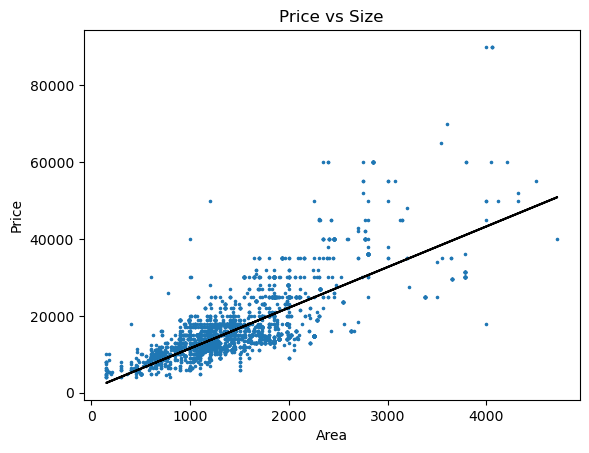


On average, rent predictions are off by ₹5623.12.


In [61]:
cities=['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune']
furnished=['Unfurnished', 'Semi-Furnished', 'Furnished']

# Cities Menu
cities_dropdown=widgets.Dropdown(options=cities,value=cities[0],description='City')

# Furnished Menu
furnished_dropdown=widgets.Dropdown(options=furnished,value=furnished[0],description='Furnished')

# Square Feet Text Box
area_text=widgets.Text(description='Square Feet')

# Calculate Button
button=widgets.Button(description='Calculate',tooltip='Run report')

# Display Widgets
display(cities_dropdown,furnished_dropdown,area_text,button)

# On Action of Button Clicked
def on_button_click(b):
    clear_output()
    display(cities_dropdown,furnished_dropdown,area_text,button)
    
    # Retrieve user inputs
    try:
        user_city=cities_dropdown.value
        user_furnished=furnished_dropdown.value
        user_area = int(area_text.value)
        
    except:
        print("Please enter a valid number.")
        return
    
    # Create new dataframe
    city_df = df[(df['city'] == user_city) & (df['furnish_type'] == user_furnished)]
    
    # Split dataframe between testing and training data
    x_train, x_test, y_train, y_test = model_selection.train_test_split(city_df['area'],city_df['price'],test_size=0.3)
 
    # Create model and train it
    area_t = np.array(x_train).reshape(-1,1)
    price_t = np.array(y_train)
    model = LinearRegression().fit(area_t,price_t)
    
    # Output prediction
    prediction = model.predict(np.array(user_area).reshape(-1,1))[0].round(2)
    
    # Checks to make sure predicted value is not negative.
    if prediction > 0:
        print('\nPredicted Price: ₹{}'.format(prediction))
        
        # Scatter plot of user relevant dataset and regression line plotted
        pyplot.scatter(x=city_df['area'], y=city_df['price'], s=2.5)
        pyplot.xlabel('Area')
        pyplot.ylabel('Price')
        pyplot.title('Price vs Size')
        # Regression line
        m, b = np.polyfit(city_df['area'], city_df['price'], 1)
        pyplot.plot(city_df['area'], m*city_df['area']+b, color='black')
        
        pyplot.show()
        
        # Check accuracy through RMSE
        y_actual = y_test
        y_pred = model.predict(np.array(x_test).reshape(-1,1))
        
    
        MSE = np.square(np.subtract(y_actual,y_pred)).mean()
        RMSE = round(math.sqrt(MSE), 2)
        
        print("\nOn average, rent predictions are off by ₹{}.".format(RMSE))        
        
    else:
        print('Please enter a larger area.')
    
button.on_click(on_button_click, False)